In [2]:
import numpy as np

np.random.seed(0)

NUM_EXAMPLES = 1000
training_y = np.random.binomial(1, 0.50, size = NUM_EXAMPLES)
training_x = np.random.binomial(1, 0.50, size = (NUM_EXAMPLES, 2))
training_x[training_y == 0, 1] = training_x[training_y == 0, 0]
training_x[training_y == 1, 1] = np.logical_not(training_x[training_y == 1, 0])

In [3]:
# Look at the features of the positive examples and the negative examples.
# What do you see?

print(
    training_x[
        training_y == 0
    ][:10]
)
print(
    training_x[
        training_y == 1
    ][:10]
)


[[0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]]
[[1 0]
 [0 1]
 [0 1]
 [1 0]
 [1 0]
 [0 1]
 [0 1]
 [0 1]
 [1 0]
 [1 0]]


In [4]:
# Print proportion of training_y that are positive.
# Print proportion of training_x that are present in each column.
# Print proportion of training_x that are present in the positives.
# And in the negatives.

print(np.sum(training_y) / len(training_y))

print(
    np.sum(training_x[training_y == 1, 0]) / np.sum(training_y)
)
print(
    np.sum(training_x[training_y == 1, 1]) / np.sum(training_y)
)

print(
    np.sum(training_x[training_y == 0, 0]) / np.sum(training_y)
)
print(
    np.sum(training_x[training_y == 0, 1]) / np.sum(training_y)
)


0.483
0.503105590062
0.496894409938
0.554865424431
0.554865424431


In [6]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD

model = Sequential()
model.add(Dense(
    1,
    activation = 'sigmoid',
    input_shape = (2,)
))

model.compile(
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
    optimizer = SGD(lr = 0.10)
)

model.fit(
    training_x,
    training_y,
    epochs = 1000,
    batch_size = 1024,
    verbose = 0
)

model.evaluate(training_x, training_y)

1000/1000 [==============================] - 0s 38us/step


[0.69223528289794922, 0.51700000000000002]

In [7]:
from keras.layers import Dense
from keras.models import Sequential
from keras.optimizers import SGD
from keras.utils import to_categorical

model = Sequential()
model.add(Dense(
    2,
    activation = 'sigmoid',
    input_shape = (2,),
))

model.add(Dense(
    1,
    activation = 'sigmoid',
    bias_initializer = 'zeros'
))

model.compile(
    loss = 'binary_crossentropy',
    metrics = ['accuracy'],
    optimizer = SGD(lr=1.0)
)

model.fit(
    training_x.astype(np.float32),
    training_y.astype(np.float32),
    epochs = 10000,
    batch_size = 1024,
    verbose = 0
)

model.evaluate(training_x, training_y)

1000/1000 [==============================] - 0s 50us/step


[0.00099261833447962999, 1.0]

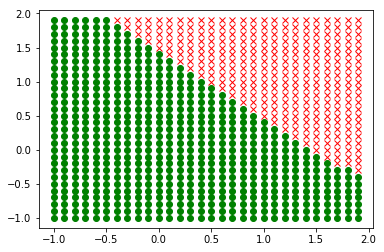

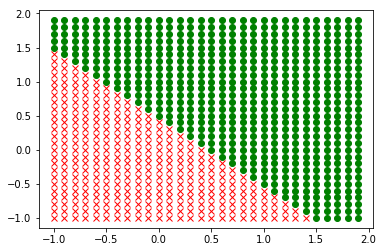

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt

# Use model.layers[0].get_weights() to extract the weights of the first layer of the network.
# The weights consist of two parts:
# 1. A 2x2 matrix. The first column are the weights used when calculating unit #1.
#    The second column are the weights used when calculating unit #2.
# 2. A vector of 2 numbers. These are the biases for the two units.
#
# Do a 2D plot where x and y are the two inputs to the network, and plot a green circle wherever the first
# unit is positive, and a red x wherever it is negative.
# Do the same with unit #2.

weights1 = model.layers[0].get_weights()[0][:, 0]
bias1 = model.layers[0].get_weights()[1][0]

weights2 = model.layers[0].get_weights()[0][:, 1]
bias2 = model.layers[0].get_weights()[1][1]

xs = np.arange(-1, 2, 0.1)
ys = np.arange(-1, 2, 0.1)

def show_graph(bias, weight0, weight1):
    positive_xs = []
    positive_ys = []
    negative_xs = []
    negative_ys = []
    for x in xs:
        for y in ys:
            if bias + (x * weight0) + (y * weight1) > 0.0:
                positive_xs.append(x)
                positive_ys.append(y)
            else:
                negative_xs.append(x)
                negative_ys.append(y)

    plt.plot(
        positive_xs, 
        positive_ys,
        'o',
        color = 'green'
    )
    plt.plot(
        negative_xs, 
        negative_ys,
        'x',
        color = 'red'
    )

show_graph(bias1, weights1[0], weights1[1])
plt.figure()
show_graph(bias2, weights2[0], weights2[1])

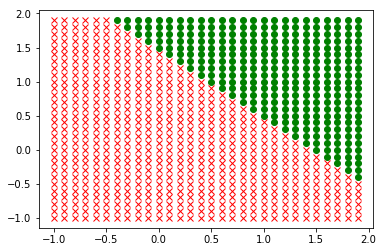

In [7]:
# Do the same with the layer 2 weights

weights3 = model.layers[1].get_weights()[0]
bias3 = model.layers[1].get_weights()[1][0]

show_graph(bias3, weights3[0], weights3[1])
plt.figure()


In [8]:
# Write down the truth statements corresponding to each graph.
# Graph1: x and not y
# Graph2: not(not x and y)
# Graph3: not(G1 and not G2)
# >> not((x and not y) and (not x and y))
# >> (x and not y) or (y and not x)


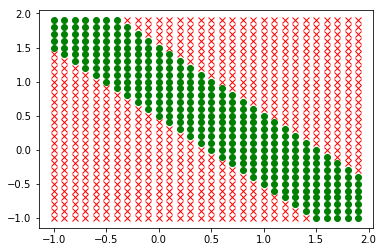

In [9]:
# A single logistic regression node can only learn a *linear* decision boundary. Use `model.predict`
# to show where the positive and negative examples are.
#
# Neural networks can learn non-linear decision boundaries.
#
# This means they can learn about "interaction effects."

def show_graph():
    positive_xs = []
    positive_ys = []
    negative_xs = []
    negative_ys = []
    for x in xs:
        for y in ys:
            if model.predict(np.array([[x, y]])) > 0.50:
                positive_xs.append(x)
                positive_ys.append(y)
            else:
                negative_xs.append(x)
                negative_ys.append(y)

    plt.plot(
        positive_xs, 
        positive_ys,
        'o',
        color = 'green'
    )
    plt.plot(
        negative_xs, 
        negative_ys,
        'x',
        color = 'red'
    )

show_graph()